In [3]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [24]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

frame rate = 30 Hz

In [38]:
rwd_node = 116

In [25]:
# List number of bouts for each animal
print('mouse  bouts')
to=0
max_bouts = 0
for nickname in AllNames:
    tf = LoadTraj(nickname+'-tf')
    print(nickname+'     ',len(tf.no))
    
    if len(tf.no) > max_bouts:
        max_bouts = len(tf.no)
        
    to+=len(tf.no)
print('Total  ',to)

mouse  bouts
B1      104
B2      166
B3      147
B4      238
C1      173
C3      339
C6      150
C7      135
C8      164
C9      127
B5      245
B6      223
B7      204
D3      245
D4      319
D5      180
D6      59
D7      150
D8      109
D9      102
Total   3579


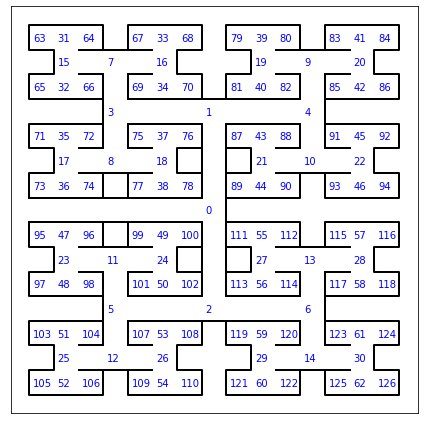

In [8]:
# Draw maze with node numbers
ma=NewMaze(6)
PlotMazeNodes(ma,figsize=6)

In [26]:
shape(tf.no), shape(tf.no[0])

/home/homero/software/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


((102,), (1, 2))

In [39]:
for bout in range(len(tf.no)):
    print("Bout: %2d visits to water port %d" % (bout, sum(tf.no[bout][:,0]==rwd_node)))

Bout:  0 visits to water port 0
Bout:  1 visits to water port 0
Bout:  2 visits to water port 0
Bout:  3 visits to water port 1
Bout:  4 visits to water port 1
Bout:  5 visits to water port 4
Bout:  6 visits to water port 0
Bout:  7 visits to water port 1
Bout:  8 visits to water port 3
Bout:  9 visits to water port 1
Bout: 10 visits to water port 0
Bout: 11 visits to water port 6
Bout: 12 visits to water port 0
Bout: 13 visits to water port 1
Bout: 14 visits to water port 0
Bout: 15 visits to water port 1
Bout: 16 visits to water port 2
Bout: 17 visits to water port 1
Bout: 18 visits to water port 1
Bout: 19 visits to water port 0
Bout: 20 visits to water port 0
Bout: 21 visits to water port 1
Bout: 22 visits to water port 0
Bout: 23 visits to water port 0
Bout: 24 visits to water port 1
Bout: 25 visits to water port 0
Bout: 26 visits to water port 2
Bout: 27 visits to water port 0
Bout: 28 visits to water port 0
Bout: 29 visits to water port 0
Bout: 30 visits to water port 1
Bout: 31

In [91]:
nickname = "C1"

In [92]:
tf=LoadTraj(nickname+'-tf')

Text(0.5, 0, 'Bout')

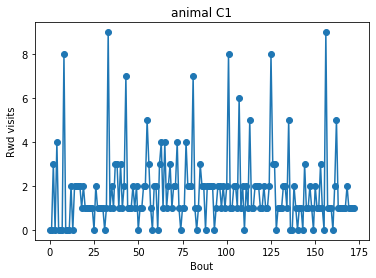

In [102]:
rwd_visits_in_bouts = [sum(tf.no[bout][:,0]==rwd_node) for bout in arange(len(tf.no))]
plt.plot(arange(len(tf.no)), rwd_visits_in_bouts, 'o-')
plt.title('animal %s' % nickname)
plt.ylabel("Rwd visits")
plt.xlabel("Bout")

In [82]:
tf.re

[array([], shape=(0, 2), dtype=int64),
 array([], shape=(0, 2), dtype=int64),
 array([[1635, 1655]]),
 array([], shape=(0, 2), dtype=int64),
 array([[ 820,  854],
        [4235, 4251]]),
 array([], shape=(0, 2), dtype=int64),
 array([], shape=(0, 2), dtype=int64),
 array([], shape=(0, 2), dtype=int64),
 array([[1068, 1077]]),
 array([], shape=(0, 2), dtype=int64),
 array([], shape=(0, 2), dtype=int64),
 array([], shape=(0, 2), dtype=int64),
 array([[3173, 3183]]),
 array([], shape=(0, 2), dtype=int64),
 array([[287, 406]]),
 array([[ 321,  452],
        [4919, 4923]]),
 array([[773, 893]]),
 array([[ 203,  217],
        [3004, 3148]]),
 array([[199, 291]]),
 array([[1267, 1357]]),
 array([[733, 819]]),
 array([], shape=(0, 2), dtype=int64),
 array([[151, 247]]),
 array([[399, 497]]),
 array([[161, 165]]),
 array([], shape=(0, 2), dtype=int64),
 array([[119, 124]]),
 array([], shape=(0, 2), dtype=int64),
 array([[120, 186]]),
 array([], shape=(0, 2), dtype=int64),
 array([], shape=(0, 2

In [110]:
for i,r in enumerate(tf.re):
    print (i, r)
    for y in r:
        print (y)

0 []
1 []
2 [[1635 1655]]
[1635 1655]
3 []
4 [[ 820  854]
 [4235 4251]]
[820 854]
[4235 4251]
5 []
6 []
7 []
8 [[1068 1077]]
[1068 1077]
9 []
10 []
11 []
12 [[3173 3183]]
[3173 3183]
13 []
14 [[287 406]]
[287 406]
15 [[ 321  452]
 [4919 4923]]
[321 452]
[4919 4923]
16 [[773 893]]
[773 893]
17 [[ 203  217]
 [3004 3148]]
[203 217]
[3004 3148]
18 [[199 291]]
[199 291]
19 [[1267 1357]]
[1267 1357]
20 [[733 819]]
[733 819]
21 []
22 [[151 247]]
[151 247]
23 [[399 497]]
[399 497]
24 [[161 165]]
[161 165]
25 []
26 [[119 124]]
[119 124]
27 []
28 [[120 186]]
[120 186]
29 []
30 []
31 []
32 [[ 99 161]]
[ 99 161]
33 [[ 207  213]
 [3191 3200]
 [5905 5938]]
[207 213]
[3191 3200]
[5905 5938]
34 [[579 654]]
[579 654]
35 [[187 244]]
[187 244]
36 []
37 [[143 222]]
[143 222]
38 [[1590 1691]]
[1590 1691]
39 [[716 728]]
[716 728]
40 [[125 133]]
[125 133]
41 [[162 243]]
[162 243]
42 [[252 263]]
[252 263]
43 [[ 123  207]
 [4781 4865]
 [8094 8183]]
[123 207]
[4781 4865]
[8094 8183]
44 []
45 [[418 445]]
[418 44

In [131]:
frames_to_rwd 

array([ 12738,  18742,  22157,  44611,  69344,  73217,  76921,  81519,
        84227,  87063,  89864,  92891,  98173, 103021, 107009, 109806,
       117297, 121565, 128241, 132323, 135809, 138793, 141507, 144955,
       148763, 153850, 158069, 164369, 169529, 173607, 178044, 182955,
       187613, 190926, 194116, 197309, 200552, 213861, 219386, 226023,
       229110, 232067, 236229, 244540, 249792, 252665, 260040, 264162,
       274791, 277630, 283395, 288895, 297203, 300160, 303071, 307516,
       313052, 315887, 318934, 323014, 326135, 329743, 332509, 335985,
       339307, 342600, 351807, 355751, 359025, 362990, 371237, 374803,
       384357, 390627, 395376, 411785, 417765, 420792, 424178, 430036,
       433582, 444243, 447897, 450756, 453719, 457078, 460385, 464236,
       472706, 477269, 483182, 487107, 492914, 499565, 503983, 517530,
       523474, 528021, 531010, 536415, 542604, 548123, 555979, 559507,
       563160, 567564, 571116, 605934, 609874, 620059, 625509, 630075,
      

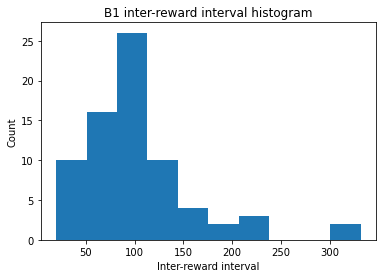

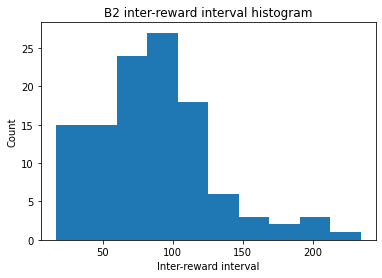

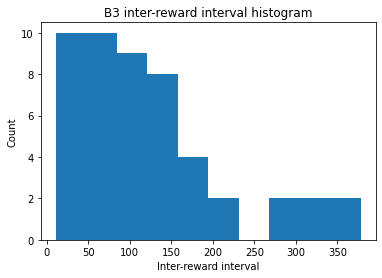

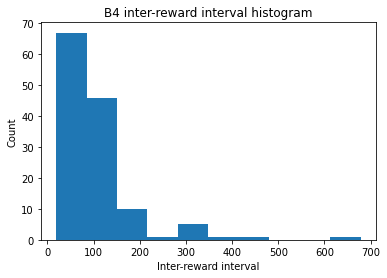

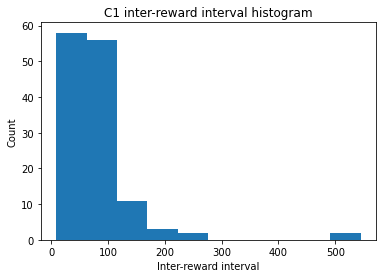

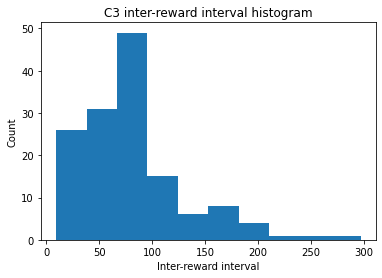

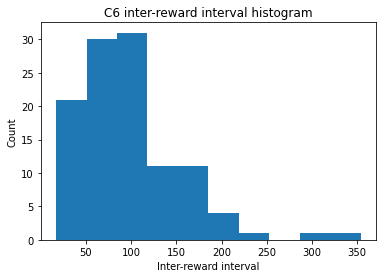

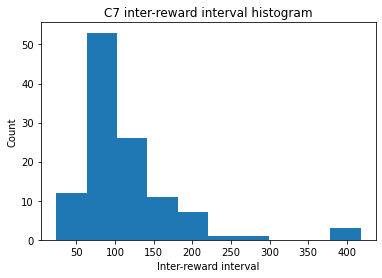

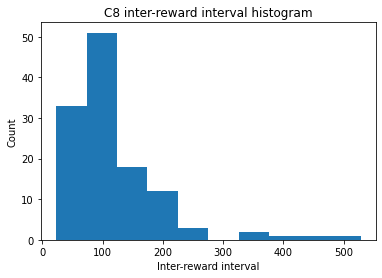

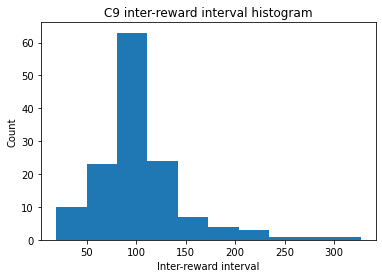

In [148]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    frames_to_rwd = np.array([init_fr_rwd[0]+tf.fr[bout_idx,0] for bout_idx, frs_rwd in enumerate(tf.re) for init_fr_rwd in frs_rwd])
    times_to_rwd = np.array([TimeInMaze(frames_to_rwd[rwd_fr_i],tf) for rwd_fr_i, _ in enumerate(frames_to_rwd)])
    plt.figure()
    plt.hist(times_to_rwd[1:]-times_to_rwd[:-1])
    plt.title("%s inter-reward interval histogram" % nickname)
    plt.xlabel('Inter-reward interval')
    plt.ylabel('Count')

# Figure 4A

Check also: https://github.com/markusmeister/Rosenberg-2021-Repository/blob/main/Maze_Analysis_3C.ipynb

C1


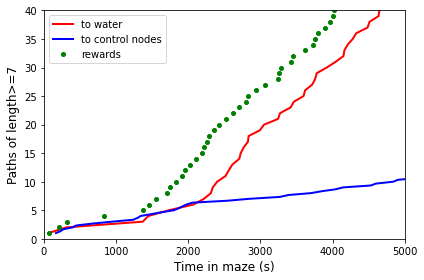

(0.0, 40.0)

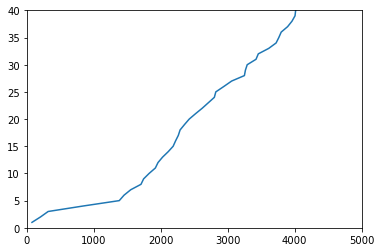

In [128]:
tf=LoadTraj(nickname+'-tf')
# make array of reward times in frames
re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
# plot cumulative long paths, rewards, time in maze
ti=np.array(tf.fr.tolist()) # time in maze
ptn_1 = FindPathsToNode(116,tf,ma) # water
ptn_2 = FindPathsToNode(94,tf,ma) # three control nodes
ptn_3 = FindPathsToNode(95,tf,ma)
ptn_4 = FindPathsToNode(73,tf,ma)
lmin=7 # minimal length
ptn_m = ptn_1[np.where(ptn_1[:,2]>=lmin)] # impose minimal length
ptn_co_m = np.concatenate((ptn_2,ptn_3,ptn_4)) # combine the 3 control nodes
ptn_co_m = ptn_co_m[np.where(ptn_co_m[:,2]>=lmin)]
ptn_co_m = ptn_co_m[np.argsort(ptn_co_m[:,3])]
x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
y=np.arange(len(ptn_m))+1
ax=plot(x,y,fmts=['r-'],figsize=(6,4)) # cumulative paths to water
x=[TimeInMaze(p,tf) for p in ptn_co_m[:,3]]
y=np.arange(len(ptn_co_m))/3+1
plot(x,y,fmts=['b-'],axes=ax) # avg number of such paths to the control nodes
x=[TimeInMaze(p,tf) for p in re]
y=np.arange(len(re))+1
plot(x,y,fmts=['g.'],markersize=8,axes=ax,
     xlabel='Time in maze (s)',
     ylabel='Paths of length>={}'.format(lmin),
     legend=['to water','to control nodes','rewards'],
     xlim=[0,5000],ylim=[0,40]); # cumulative rewards
print(nickname)
plt.show();

x=[TimeInMaze(p,tf) for p in re]
y=np.arange(len(re))+1
plt.plot(x,y, label='rewards')
plt.xlim(0,5000)
plt.ylim(0,40)

B1


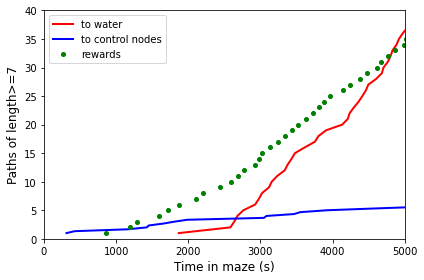

B2


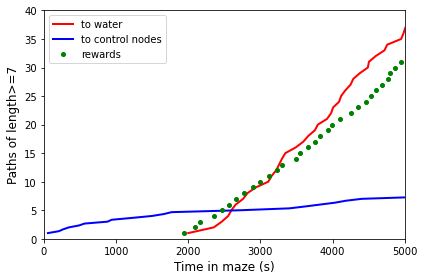

B3


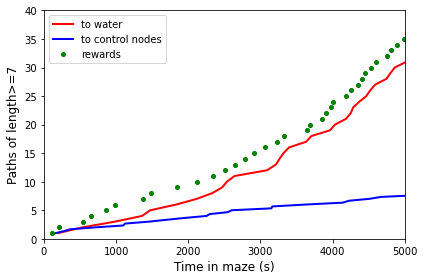

B4


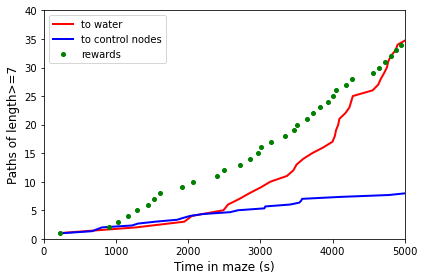

C1


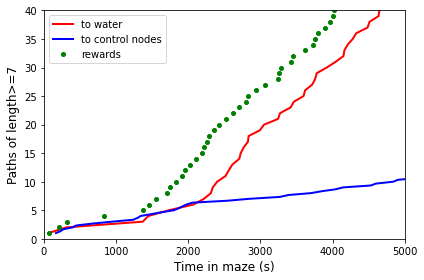

C3


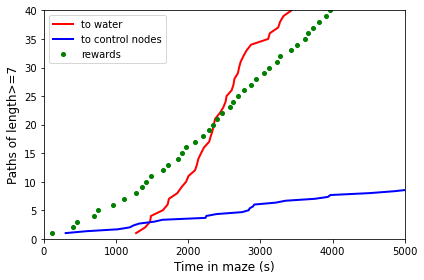

C6


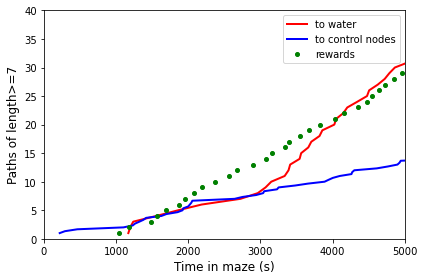

C7


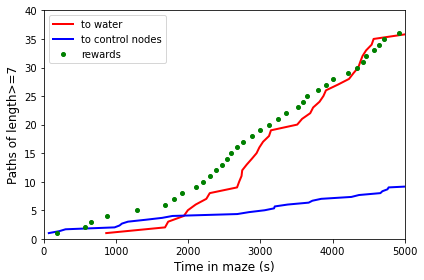

C8


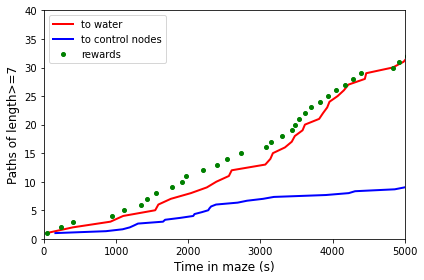

C9


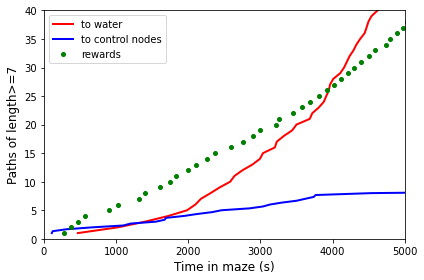

In [9]:
# plot long paths to water & control nodes vs time in maze for all animals, length>=7, time 0-5000 s
for nickname in RewNames:
    tf=LoadTraj(nickname+'-tf')
    # make array of reward times in frames
    re = np.array([y[0]+tf.fr[i,0] for i,r in enumerate(tf.re) for y in r])
    # plot cumulative long paths, rewards, time in maze
    ti=np.array(tf.fr.tolist()) # time in maze
    ptn_1 = FindPathsToNode(116,tf,ma) # water
    ptn_2 = FindPathsToNode(94,tf,ma) # three control nodes
    ptn_3 = FindPathsToNode(95,tf,ma)
    ptn_4 = FindPathsToNode(73,tf,ma)
    lmin=7 # minimal length
    ptn_m = ptn_1[np.where(ptn_1[:,2]>=lmin)] # impose minimal length
    ptn_co_m = np.concatenate((ptn_2,ptn_3,ptn_4)) # combine the 3 control nodes
    ptn_co_m = ptn_co_m[np.where(ptn_co_m[:,2]>=lmin)]
    ptn_co_m = ptn_co_m[np.argsort(ptn_co_m[:,3])]
    x=[TimeInMaze(p,tf) for p in ptn_m[:,3]]
    y=np.arange(len(ptn_m))+1
    ax=plot(x,y,fmts=['r-'],figsize=(6,4)) # cumulative paths to water
    x=[TimeInMaze(p,tf) for p in ptn_co_m[:,3]]
    y=np.arange(len(ptn_co_m))/3+1
    plot(x,y,fmts=['b-'],axes=ax) # avg number of such paths to the control nodes
    x=[TimeInMaze(p,tf) for p in re]
    y=np.arange(len(re))+1
    plot(x,y,fmts=['g.'],markersize=8,axes=ax,
         xlabel='Time in maze (s)',
         ylabel='Paths of length>={}'.format(lmin),
         legend=['to water','to control nodes','rewards'],
         xlim=[0,5000],ylim=[0,40]); # cumulative rewards
    print(nickname)
    plt.show();
plt.plot(re)